In [2]:
%matplotlib inline

from matplotlib import pyplot as plt  # グラフ描画ライブラリmatplotlibのpyplotモジュールをインポート
import numpy as np  # 数値計算ライブラリNumPyをインポート
import torch        # PyTorchをインポート

# PyTorchのテンソル表示設定：端の要素数・出力幅を指定（デバッグ用）
torch.set_printoptions(edgeitems=2, linewidth=75)

# PyTorchの乱数シードを固定して再現性を確保
torch.manual_seed(123)

In [3]:
from torchvision import datasets  # torchvisionのデータセットモジュールをインポート

data_path = "../data-unversioned/p1ch7/"  # CIFAR-10データを保存するローカルディレクトリ

# 訓練データ（train=True）をダウンロードして読み込む
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)

# 検証データ（train=False）をダウンロードして読み込む
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

100%|██████████| 170M/170M [08:27<00:00, 336kB/s]   


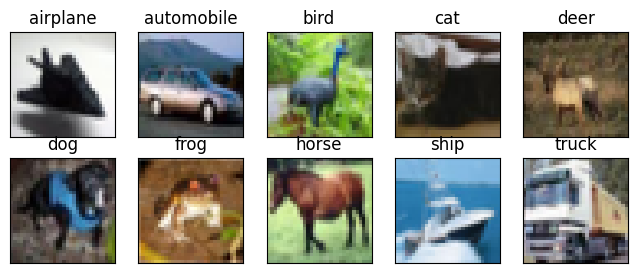

In [4]:
# CIFAR-10における10クラスの名称を定義
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

# 描画用のFigureオブジェクトを作成（幅8インチ・高さ3インチ）
fig = plt.figure(figsize=(8, 3))

num_classes = 10  # CIFAR-10は10クラス分類

# 各クラスに対して代表的な画像を1枚ずつ取得・描画
for i in range(num_classes):
    ax = fig.add_subplot(
        2, 5, 1 + i, xticks=[], yticks=[]
    )  # 2行5列のサブプロットを追加
    ax.set_title(class_names[i])  # クラス名をタイトルとして設定
    img = next(img for img, label in cifar10 if label == i)  # 該当クラスの画像を1枚取得
    plt.imshow(img)  # 画像を表示

# グラフを表示
plt.show()

In [5]:
type(cifar10).__mro__  # CIFAR10クラスの継承階層（Method Resolution Order）を表示

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [6]:
len(cifar10)  # データセットのサイズ（画像枚数）を表示

50000

In [7]:
img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'automobile')

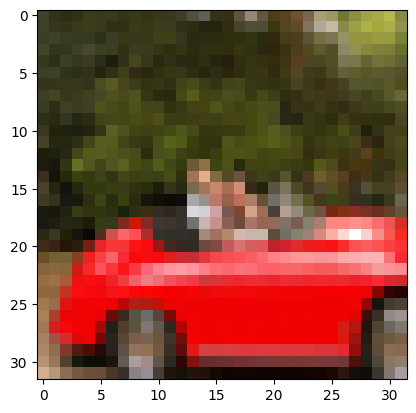

In [8]:
plt.imshow(img)
plt.show()

In [9]:
from torchvision import transforms  # torchvisionの画像変換ユーティリティをインポート

dir(transforms)  # transformsモジュールに含まれる属性（関数・クラスなど）の一覧を表示

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

In [10]:
# PIL画像やNumPy配列をPyTorchのテンソル（torch.Tensor）に変換する変換器を作成
to_tensor = transforms.ToTensor()

# 'img' はPIL画像または NumPy 配列（H × W × C）であると仮定
img_t = to_tensor(img)  # ToTensorにより以下の変換が行われる：
# ① [H, W, C] → [C, H, W] （PyTorchのテンソル形式に準拠）
# ② pixel値 [0, 255] → [0.0, 1.0] の float32 にスケーリングされる

# img_t の shape を確認：通常は [チャネル数, 高さ, 幅] の3次元テンソル
img_t.shape

torch.Size([3, 32, 32])

In [13]:
from torchvision import transforms

# CIFAR-10 データセットを PyTorch Tensor 形式で読み込む
tensor_cifar10 = datasets.CIFAR10(
    root=data_path,  # データセットの保存先ディレクトリ
    train=True,  # 学習用データを使用（Falseならテストデータ）
    download=False,  # 既にダウンロード済みであると仮定（未ダウンロードならTrueにする）
    transform=transforms.ToTensor(),  # 各画像に対して ToTensor を適用（PIL → Tensor 変換）
)

# 説明:
# この設定により、データセットから画像を取り出すと、各画像は次の形式になる：
# - 形式：torch.Tensor
# - shape：[3, 32, 32]（チャンネル数、高さ、幅）
# - 値の範囲：[0.0, 1.0]（uint8からfloatにスケーリング）

In [14]:
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [15]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [16]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

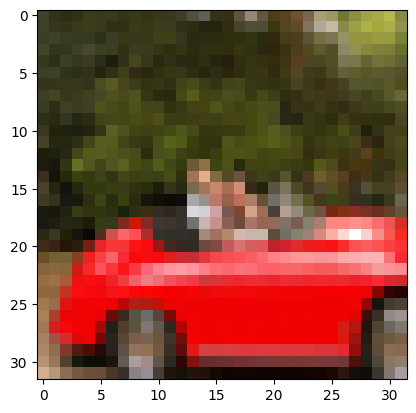

In [17]:
plt.imshow(img_t.permute(1, 2, 0))  # (C, H, W) → (H, W, C) に変換して表示
plt.show()  # 実際に画像を表示

In [18]:
# CIFAR-10データセットから、ToTensor()によって変換された画像テンソル(img_t)のみを抽出し、
# それらを新たな次元（dim=3）でスタックして1つの4次元テンソル imgs を作成する。
# 各 img_t の形状は (3, 32, 32) であるため、
# 結果として imgs の形状は (3, 32, 32, 50000) となる（50000枚の画像を格納）。
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)

# imgs の形状を確認
imgs.shape

torch.Size([3, 32, 32, 50000])

In [19]:
# imgs は形状 (3, 32, 32, 50000) のテンソルで、RGBチャンネル × 高さ × 幅 × 画像枚数を表す。
# view(3, -1) によって、各チャンネルを1次元に平坦化し、形状 (3, 32×32×50000) = (3, 51200000) に変形する。
# その後、dim=1 で平均を取ることで、R, G, B 各チャンネルの画素値の平均を計算する。
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [20]:
# imgs は形状 (3, 32, 32, 50000) のテンソルで、RGBチャンネル × 高さ × 幅 × 枚数を表す。
# .view(3, -1) によって、各チャンネルを1次元に平坦化（flatten）し、形状 (3, 51200000) に変形する。
# その後、.std(dim=1) を使って、各チャンネル（R, G, B）における画素値の標準偏差を計算する。
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [21]:
# CIFAR-10の学習データセットを読み込み、
# 各画像に対して以下の前処理を行う：
# 1. ToTensor(): PIL画像をTensor形式（[0,1]の範囲）に変換
# 2. Normalize(): 各RGBチャンネルごとに、CIFAR-10全体の平均と標準偏差で正規化

transformed_cifar10 = datasets.CIFAR10(
    data_path,  # データ保存先のパス
    train=True,  # 学習用データセットを読み込む
    download=False,  # すでにダウンロード済みのため再ダウンロードしない
    transform=transforms.Compose(
        [
            transforms.ToTensor(),  # PIL → Tensor（値の範囲: 0〜1）
            transforms.Normalize(
                mean=(0.4915, 0.4823, 0.4468),  # R, G, B各チャンネルの平均
                std=(0.2470, 0.2435, 0.2616),  # R, G, B各チャンネルの標準偏差
            ),
        ]
    ),
)

In [22]:
# CIFAR-10の検証用データセット（train=False）を読み込み、
# 各画像に対して以下の前処理を行う：
# 1. ToTensor(): PIL画像をTensor形式（[0,1]の範囲）に変換
# 2. Normalize(): RGBチャンネルごとに訓練データと同じ平均・標準偏差で正規化

transformed_cifar10_val = datasets.CIFAR10(
    data_path,  # データ保存先のパス
    train=False,  # 検証用データセットを読み込む
    download=False,  # すでにダウンロード済みのため再ダウンロードしない
    transform=transforms.Compose(
        [
            transforms.ToTensor(),  # PIL → Tensor（値の範囲: 0〜1）
            transforms.Normalize(
                mean=(
                    0.4915,
                    0.4823,
                    0.4468,
                ),  # R, G, B各チャンネルの平均（訓練データ基準）
                std=(
                    0.2470,
                    0.2435,
                    0.2616,
                ),  # R, G, B各チャンネルの標準偏差（訓練データ基準）
            ),
        ]
    ),
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9806982..2.126078].


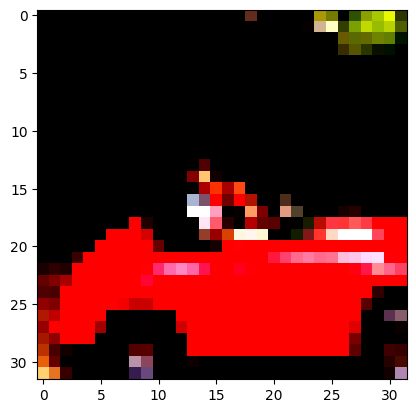

In [23]:
img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()